In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 4.2MB/s 
     |████████████████████████████████| 2.1MB 32.6MB/s 
     |████████████████████████████████| 9.5MB 33.4MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install gluonts

     |████████████████████████████████| 573kB 4.3MB/s 
     |████████████████████████████████| 194kB 7.3MB/s 
     |████████████████████████████████| 8.7MB 8.7MB/s 
  Created wheel for ujson: filename=ujson-1.35-cp36-cp36m-linux_x86_64.whl size=68033 sha256=682a5064fd44308a988e0a186c1bfe00947c15c25fd8b7fbb201167ecfb55591
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built ujson


In [ ]:
!pip install shap

     |████████████████████████████████| 327kB 5.3MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463920 sha256=fb2357a56ed6b136e55b1462568a91a17581503f9fc7786f7ab592d0f49e09a2
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [ ]:
!pip install utils

In [ ]:
!pip install metrics

     |████████████████████████████████| 849kB 4.3MB/s 
  Created wheel for metrics: filename=metrics-0.3.3-py2.py3-none-any.whl size=17814 sha256=bf887542180b942abc3f8d37e4c688d7fa0d9b2d5efd8f6dcd73c7b46956f923
  Stored in directory: /root/.cache/pip/wheels/38/e8/55/c4c648451a33a60920318eba4c5735088dbf78dc20d4277db0
  Created wheel for pathspec: filename=pathspec-0.5.5-cp36-none-any.whl size=24230 sha256=4babac587e8fb6b1c4f4da1e312da7433fa9ee306ad38d5df4bc54332927acb5
  Stored in directory: /root/.cache/pip/wheels/d1/2e/6b/c67842adf3b13ea33ca3fe6a2a963622821ad647db724688e2
Successfully built metrics pathspec
ERROR: jupyterlab-pygments 0.1.2 has requirement pygments<3,>=2.4.1, but you'll have pygments 2.2.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1


In [ ]:
!pip install mxnet

     |████████████████████████████████| 55.0MB 77kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd #Basic library for all of our dataset operations
import numpy as np
import requests
import io
import statsmodels.tsa.api as smt
import statsmodels as sm
import tensorflow as tf
import pmdarima as pm
import warnings
import xgboost as xgb

import lightgbm as lgb
import gluonts
from math import sqrt

import shap
warnings.filterwarnings("ignore") #We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones

#from utils.metrics import evaluate
#from utils.plots import bar_metrics

from statsmodels.tsa.ar_model import AR
from random import random
from datetime import datetime
from fbprophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn import linear_model, svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer,r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from math import sqrt
from xgboost import plot_importance, plot_tree
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer
from gluonts.dataset.common import ListDataset
from gluonts.evaluation.backtest import make_evaluation_predictions
from itertools import islice
from pylab import rcParams
# progress bar
from tqdm import tqdm, tqdm_notebook



#Extra settings
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
mpl.rcParams['figure.figsize'] = 18, 8

print(tf.__version__)

data = pd.read_excel('https://github.com/cruveilc/Occupancy-Forecasting/blob/main/output.xlsx?raw=true',
sheet_name=0,
header=0,
index_col=[0],
keep_default_na=True
)
data = data[['label']]

2.4.0


In [ ]:
df=data
df['NewDateTime'] = pd.to_datetime(df.index)
df.index = df['NewDateTime']
df_p = df.resample('H').mean()
df_p[df_p.isnull().any(axis=1)]=0.1
df_p=df_p.clip(lower=0.001)
df_p

,label
NewDateTime,
2015-01-06 15:00:00,0.272478
2015-01-06 16:00:00,1.830740
2015-01-06 17:00:00,1.842989
2015-01-06 18:00:00,2.603144
2015-01-06 19:00:00,2.724946
...,...
2015-12-29 20:00:00,0.001000
2015-12-29 21:00:00,0.011667
2015-12-29 22:00:00,0.009167


In [ ]:
data=df_p

In [ ]:
resultsDict={}
predictionsDict={}


split_date ='2015-09-01'
df_training = data.loc[data.index <= split_date]
df_test = data.loc[data.index > split_date]
print(f"{len(df_training)} days of training data \n {len(df_test)} days of testing data ")



5698 days of training data 
 2880 days of testing data 


-0.2881279181907226


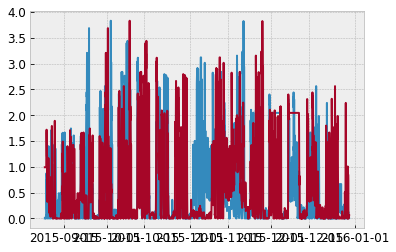

In [ ]:
#Also add the naive mean average value
n_week = 24*7
df_test['last_week']=df_test.label.shift(n_week)
mean = df_test.label.mean()
mean = np.array([mean for u in range(len(df_test))])
resultsDict['Naive mean'] = r2_score(df_test.label, mean)
predictionsDict['Naive mean'] = mean
resultsDict['Yesterdays value'] = r2_score(df_test.label[n_week:], df_test.last_week[n_week:])
predictionsDict['Yesterdays value'] = df_test.last_week[n_week:].values
print(r2_score(df_test.label[n_week:], df_test.last_week[n_week:]))
plt.plot(df_test.label[n_week:])
plt.plot(df_test.last_week[n_week:]) 

AutoArima

In [ ]:
#building the model

autoModel = pm.auto_arima(df_training.label, trace=True, error_action='ignore', suppress_warnings=True,seasonal=False)
autoModel.fit(df_training.label)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4349.886, Time=3.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4570.753, Time=0.81 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4468.045, Time=0.54 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4451.448, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4568.754, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.98 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=11.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.54 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=18.93 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4442.680, Time=1.86 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.73 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4048.520, Time=10.35 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4428.060, Time=1.57 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=4430.843, Time=2.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4430.051, T

ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
order = autoModel.order
yhat = list()
for t in tqdm(range(len(df_test.label))):
    temp_train = data[:len(df_training)+t]
    model = ARIMA(temp_train.label, order=order)
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]
    
yhat = pd.concat(yhat)
#resultsDict['AutoARIMA {0}'.format(order)] = evaluate(df_test.label, yhat)
predictionsDict['AutoARIMA {0}'.format(order)] = yhat.values

100%|██████████| 2880/2880 [3:22:08<00:00,  4.21s/it]


NameError: ignored

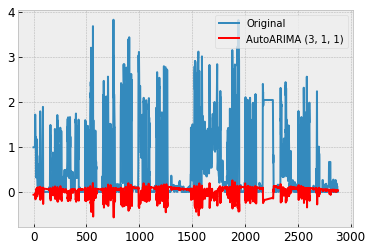

In [ ]:
plt.plot(df_test.label.values , label='Original')
plt.plot(yhat.values,color='red',label='AutoARIMA {0}'.format(order))
plt.legend()

In [ ]:
df=data

In [ ]:
df['NewDateTime'] = pd.to_datetime(df.index)
df.index = df['NewDateTime']
df_p = df.resample('H').mean()

df_p

,label
NewDateTime,
2015-01-06 15:00:00,0.272478
2015-01-06 16:00:00,1.830740
2015-01-06 17:00:00,1.842989
2015-01-06 18:00:00,2.603144
2015-01-06 19:00:00,2.724946
...,...
2015-12-29 20:00:00,0.000000
2015-12-29 21:00:00,0.011667
2015-12-29 22:00:00,0.009167


In [ ]:
df_p[df_p.isnull().any(axis=1)]=0.1

In [ ]:
df_p.isnull().sum()

label    0
dtype: int64

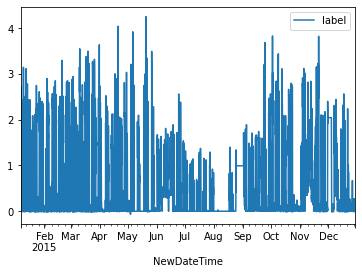

In [ ]:
df_p.plot()

In [ ]:
df_p=df_p.clip(lower=0.001)

In [ ]:
data = data['label']
data = data.clip(lower=0.001)

In [ ]:
data.index = pd.to_datetime(data.index)
data.head

<bound method NDFrame.head of NewDateTime
2015-01-06 15:00:00    1.128000
2015-01-06 15:05:00    0.622000
2015-01-06 15:10:00    0.634000
2015-01-06 15:15:00    0.285733
2015-01-06 15:20:00    0.094000
                         ...   
2015-12-30 00:05:00    0.010000
2015-12-30 00:10:00    0.010000
2015-12-30 00:15:00    0.010000
2015-12-30 00:20:00    0.010000
2015-12-30 00:25:00    0.010000
Name: label, Length: 102930, dtype: float64>

In [ ]:
import cufflinks as cf

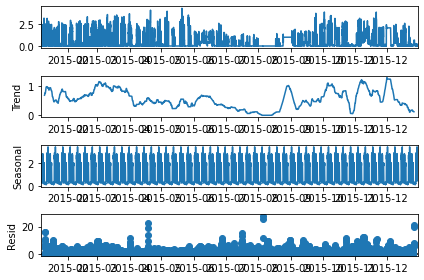

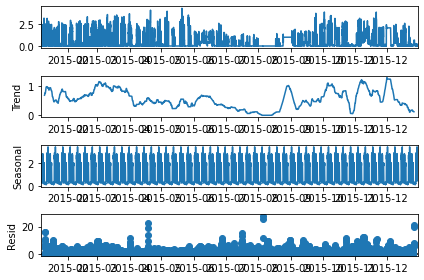

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_p, model = "multiplicative",period = 7*24)

result.plot()

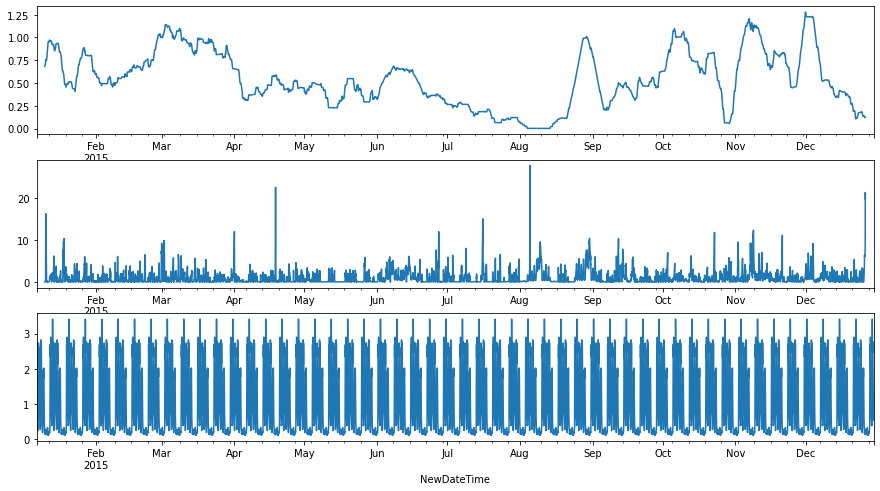

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
result.trend.plot(ax=ax1)
result.resid.plot(ax=ax2)
result.seasonal.plot(ax=ax3)

In [ ]:
from pmdarima.arima import auto_arima

model =auto_arima(df_p[0:200], error_action='ignore', trace=1,  seasonal=True, m=45)

print(model.aic())



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[45] intercept   : AIC=256.880, Time=12.58 sec
 ARIMA(0,1,0)(0,0,0)[45] intercept   : AIC=267.206, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[45] intercept   : AIC=260.787, Time=1.31 sec
 ARIMA(0,1,1)(0,0,1)[45] intercept   : AIC=261.476, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[45]             : AIC=265.314, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[45] intercept   : AIC=254.881, Time=5.84 sec
 ARIMA(2,1,2)(0,0,0)[45] intercept   : AIC=254.587, Time=0.37 sec
 ARIMA(2,1,2)(1,0,0)[45] intercept   : AIC=254.888, Time=5.16 sec
 ARIMA(1,1,2)(0,0,0)[45] intercept   : AIC=262.823, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[45] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(3,1,2)(0,0,0)[45] intercept   : AIC=256.162, Time=0.30 sec
 ARIMA(2,1,3)(0,0,0)[45] intercept   : AIC=256.135, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[45] intercept   : AIC=263.085, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[45] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(3,1,1)(0,0,0)[45] intercept   : A

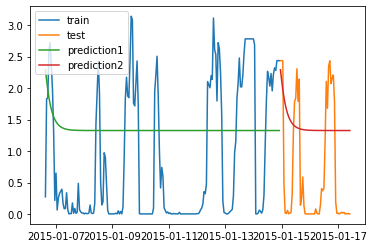

In [ ]:

train=df_p[0:200]
test=df_p[200:260]
model.fit(train)

prediction1 = model.predict(n_periods=len(train))
prediction2 = model.predict(n_periods=len(test))

#plot the predictions for validation set
plt.plot(train.index,train, label='train')
plt.plot(test.index,test, label='test')
plt.plot(train.index, prediction1, label='prediction1')
plt.plot(test.index, prediction2, label='prediction2')
plt.legend()
plt.show()

In [ ]:
# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(data[0:12000], order=(1,0,1)) 
ax = plt.gca()
results = model.fit() 
plt.plot(data)
plt.plot(results.fittedvalues, color='red')
ax.legend(['Car Count', 'Forecast'])

print (results.summary())

In [ ]:
# forecast quick and dirty
# TODO: clean this up
fig = plt.figure(figsize=(20,8))
num_points = len(data)
x = results.predict(start=(12000), end=(13000), dynamic=False)
x.plot()
#data.plot()
#plt.plot(x, color='r')
